# Lecture des données géospatiales


Pour relier les données de rendement de production annuelle d'avoine aux données météorologiques annuelles, nous devons utiliser des données géospatiales et la librairie geopandas.

Les données géospatiales des régions ("district") peuvent être téléchargées.  Il existe plusieurs formats de données géospatiales.  Nous utiliserons les shape files (.shp).

https://geohub.lio.gov.on.ca/datasets/municipal-boundary-upper-tier-and-district/explore?location=46.487638%2C-81.744527%2C4.73&showTable=true




<img src='https://drive.google.com/uc?export=view&id=1S3lIKmZdOe0-PchH9-ITBmdvbn0zPEO3' width='450px'>

Nous allons placer les stations météorologiques dans ces régions.



### Installation et chargement des librairies python

Nous devons d'abord charger (et possiblement installer) les librairies nécessaires.  

Voici une description de certaines des librairies utilisées.

- `os` permet d'utiliser des fonctions liées aux fichiers sur disque et au système d'exploitation.
- `collections`  fournit des structures de données supplémentaires et des alternatives aux types de données intégrés (built-in) 
- `matplotlib` et `seaborn` pour générer des graphiques
- `numpy` pour des opérations d'algèbres linéaires et mathématiques
- `pandas` pour faciliter la manipulation et la structure des données (parfois lent pour les gros jeux de données)
- `geopandas` étend les fonctionnalités de la bibliothèque Pandas pour la manipulation et l'analyse des données géospatiales.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#!pip install geopandas
import geopandas as gpd

#!pip install ydata_profiling
#from ydata_profiling import ProfileReport
colors = ["#40BEAD", "#248CC4", "#308E81", "#576AC9"] # palette IVADO
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#%cd /content/drive/My Drive/Notebook_Dataset

### Lecture du shapefile avec geopandas

Le fichier .shp contient les coordonnées de polygones représentant les contours des régions administratives ontariennes.   Il est possible de représenter graphiquement les régions sous forme de carte.  Le fichier récupéré contient aussi le nom des régions. 

 Nous allons donc nous servir :
 
* du nom des régions pour faire le chevauchement avec les données de rendement
* les coordonnées géographiques des stations météorologiques pour faire le lien avec les données météorologiques

In [3]:
# Pour récupérer les données de Google Drive
import urllib.request 
import gdown
file_ids = [("MUNIC_BND_UPPER_AND_DIST.shp", '1yaTkZXl2CVMGEsAvn3dkS4ezrwbpYZ7R'),
            ("MUNIC_BND_UPPER_AND_DIST.shx", '1mGn7yo7mLjMauxwzXa_Xf2pjth0m6_OR'),
            ("MUNIC_BND_UPPER_AND_DIST.prj", '1UemI8VZciW9eitgGIqewcn0Vzjp8xHdN'),
            ("MUNIC_BND_UPPER_AND_DIST.dbf", '1iajak-GjTI7xZvPSRqZrO0EoyHAowQNv')]

url = "https://drive.google.com/uc?export=view&id=%s"

datadir = 'tmp/LIO-2022-10-19'
if not os.path.exists(datadir):
    os.makedirs(datadir)

/Users/genevieve/Documents/Travail/IVADO/Project/rendement_avoine_simple/.venv/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
for file_name,file_id in file_ids:
    url_file = url%file_id
    print(url_file)
    output = os.path.join(datadir, file_name)
    dest, resp = urllib.request.urlretrieve(url_file, )
    header = dict(resp.__dict__['_headers'])
    disposition = header.get('Content-Disposition', None)
    length = header.get('Content-Length', None)
    if length is None:
        gdown.download(url_file, output, quiet=False)

https://drive.google.com/uc?export=view&id=1yaTkZXl2CVMGEsAvn3dkS4ezrwbpYZ7R


Downloading...
From (uriginal): https://drive.google.com/uc?export=view&id=1yaTkZXl2CVMGEsAvn3dkS4ezrwbpYZ7R
From (redirected): https://drive.google.com/uc?export=view&id=1yaTkZXl2CVMGEsAvn3dkS4ezrwbpYZ7R&confirm=t&uuid=c2f72c04-7395-4229-8fbf-51a7f388bdc7
To: /Users/genevieve/Documents/Travail/IVADO/Project/rendement_avoine_simple/notebooks/tmp/LIO-2022-10-19/MUNIC_BND_UPPER_AND_DIST.shp
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 108M/108M [00:02<00:00, 40.8MB/s]


https://drive.google.com/uc?export=view&id=1mGn7yo7mLjMauxwzXa_Xf2pjth0m6_OR
https://drive.google.com/uc?export=view&id=1UemI8VZciW9eitgGIqewcn0Vzjp8xHdN
https://drive.google.com/uc?export=view&id=1iajak-GjTI7xZvPSRqZrO0EoyHAowQNv


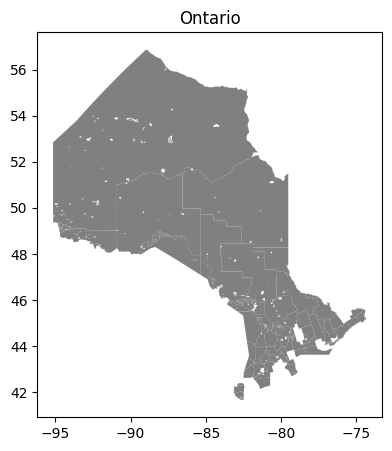

In [5]:
# Ceci prend environ 30-60 secondes à exécuter sur un macbook pro 2019
#data_path = "../data/raw/"
data_path = 'tmp'
ontario_shp = os.path.join(data_path, "LIO-2022-10-19/MUNIC_BND_UPPER_AND_DIST.shp")
ontario = gpd.read_file(ontario_shp)
ontario.plot(figsize=(10, 5), color='grey')
plt.title("Ontario")
plt.show()

In [6]:
ontario.head(3)

,OGF_ID,SUBTYPE,STYPE_NUM,MUN_NAME,MUNID,MAH_CODE,EXTENT_T,ASSESS_C,NAME_PREF,NAME_SHORT,GUNT_DES,GEO_UPD_DT,EFF_DATE,geometry
0,67907495,Upper Tier Municipality,70,COUNTY OF NORTHUMBERLAND,14000,61074,Islands,1400,COUNTY OF,NORTHUMBERLAND,2561,20220909134431,20220909103055,"MULTIPOLYGON (((-77.74251 43.97720, -77.74248 ..."
1,67907531,Upper Tier Municipality,70,COUNTY OF MIDDLESEX,39000,59000,Mainland,3900,COUNTY OF,MIDDLESEX,2561,20220909134432,20220909103101,"MULTIPOLYGON (((-81.43651 42.79026, -81.43651 ..."
2,67907554,Upper Tier Municipality,70,COUNTY OF FRONTENAC,10000,46000,Water,1000,COUNTY OF,FRONTENAC,2561,20220909134434,20220909103107,"POLYGON ((-76.16528 44.28195, -76.16429 44.240..."


In [7]:
ontario.columns

Index(['OGF_ID', 'SUBTYPE', 'STYPE_NUM', 'MUN_NAME', 'MUNID', 'MAH_CODE',
       'EXTENT_T', 'ASSESS_C', 'NAME_PREF', 'NAME_SHORT', 'GUNT_DES',
       'GEO_UPD_DT', 'EFF_DATE', 'geometry'],
      dtype='object')

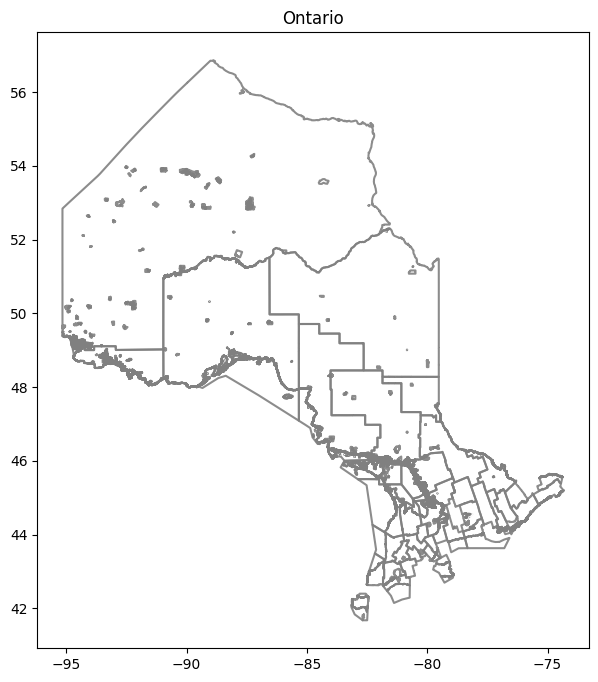

In [8]:
ontario.boundary.plot(color='grey', alpha=0.9, figsize=(13, 8))
plt.title("Ontario")
plt.show()

## Lecture données de rendement de la production d'avoine

In [9]:
id = "1qWzM2lfJlsB4VJRy0o-Hm8sfr8W2aROG"  
url = "https://drive.google.com/uc?export=view&id=%s" % id
oats = pd.read_csv(url, index_col=0)


# Provenant du Notebook 1_Nettoyage_Donnees_Avoine.ipynb
#filename = 'rendement_avoine_v1.csv'
#oats = pd.read_csv(filename, index_col=0)

In [10]:
oats.head()

,Region,Ensemencee,Recoltee,Rendement,Production_boisseaux,Production_tonnes,Onglet,Annee
0,Brant,0.000000,0.000000,0.000000,0.000000,0.000000,oats2022,2022
1,Chatham-Kent,0.000000,0.000000,0.000000,0.000000,0.000000,oats2022,2022
2,Elgin,0.000000,0.000000,0.000000,0.000000,0.000000,oats2022,2022
3,Essex,0.000000,0.000000,0.000000,0.000000,0.000000,oats2022,2022
4,Haldimand-Norfolk,1025.801292,865.261503,56.554159,48.934137,0.993852,oats2022,2022


## Lecture données météorologiques

In [11]:
file_id = '1d5DzDVtOtXtf02KF7Nk05XyveMxYfuzi'
url = "https://drive.google.com/uc?export=view&id=%s" % file_id
weather = pd.read_csv(url)

# Provenant du Notebook 2_Nettoyage_Donnees_Temperature.ipynb
#weather = pd.read_csv('weather_yearly_v1.csv')

In [12]:
weather.head()

,Unnamed: 0,LOCAL_YEAR,STATION_NAME,x,y,LATITUDE,LONGITUDE,CLIMATE_IDENTIFIER,TOTAL_PRECIPITATION,DAYS_WITH_VALID_PRECIP,DAYS_WITH_PRECIP_GE_1MM,TOTAL_SNOWFALL,DAYS_WITH_VALID_SNOWFALL,DAYS_WITH_VALID_SUNSHINE,MEAN_TEMPERATURE,MAX_TEMPERATURE,MIN_TEMPERATURE
0,0,2004,ALBERTON,-80.050000,43.183333,43.183,-80.050,6150060,803.3,366.0,118.0,94.0,366.0,0.0,8.925161,32.0,-27.0
1,4,2004,ALLISTON NELSON,-79.872247,44.151397,44.151,-79.872,6110218,860.2,366.0,144.0,186.0,366.0,0.0,8.432473,32.0,-30.0
2,5,2004,AMHERSTBURG,-83.094463,42.103358,42.103,-83.094,6130257,1053.2,366.0,126.0,83.8,366.0,0.0,10.800269,32.0,-22.0
3,6,2004,APPLETON,-76.112805,45.185840,45.186,-76.113,6100285,833.6,366.0,113.0,118.8,366.0,0.0,7.232634,30.0,-32.0
4,8,2004,ATIKOKAN (AUT),-91.628056,48.761111,48.761,-91.628,6020LPQ,658.8,343.0,103.0,4.6,13.0,0.0,3.959023,30.7,-39.5


## Chevauchement dans les données

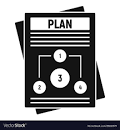


<span style='font-size:20px'>
Il faut intégrer les deux jeux de données, soit les données météorologiques et les données de rendement de la production d'avoine.

Comment faire ? 

1-  Associer les données de rendement de production d'avoine aux données géograghiques des régions ontariennes par nom de région.

2-  Associer les stations météorologiques aux régions ontariennes en utilisant les coordonnées géographiques des régions et des stations.

3 - Aggréger les valeurs collectées par des stations météo se trouvant dans une même région.

</span>

### Étape 1 - Données de rendement d'avoine + données géographiques

<br>

<span style='font-size:20px'>
Avant de procéder avec la première étape, nous devons vérifier que les noms de régions dans les données de rendement et dans les données géographiques sont les mêmes.
Ils doivent être identiques car ils serviront de clés pour fusionner les deux jeux de données.
</span>

In [13]:
ontario.loc[:,'Region'] = [c.title() for c in ontario.NAME_SHORT]
oats.loc[:,'Region'] = [c.title() for c in oats.Region]
ontario_regions = sorted(ontario.Region.unique())
oats_regions = sorted(oats.Region.unique().tolist())
regions_common = set(ontario_regions) & set(oats_regions)
diff_regions = list(set(ontario_regions).difference(set(oats_regions)))

In [14]:
print(F'Nombre de régions communes: {len(regions_common)}')
print(F'Nombre de régions dans le fichier de régions: {len(ontario_regions)}')
print(F'Nombre de régions dans le fichier de rendement: {len(oats_regions)}')

print()
print(F"Régions dans le shapefile ne se trouvant pas dans le fichier de rendement : {len(diff_regions)}/{len(oats_regions)}")
print(', '.join(diff_regions))

diff_regions = list(set(oats_regions).difference(set(ontario_regions)))
print(F"Régions dans le fichier de rendement ne se trouvant pas dans le shapefile : {len(diff_regions)}/{len(ontario_regions)}")
print(', '.join(diff_regions))

Nombre de régions communes: 40
Nombre de régions dans le fichier de régions: 40
Nombre de régions dans le fichier de rendement: 50

Régions dans le shapefile ne se trouvant pas dans le fichier de rendement : 0/50

Régions dans le fichier de rendement ne se trouvant pas dans le shapefile : 10/40
Chatham-Kent, Grand Sudbury, Ottawa, Brant, Prescott And Russell United, Leeds And Grenville United, Hamilton, Kawartha Lakes, Haldimand-Norfolk, Prince Edward


In [15]:
ontario_oats = ontario.merge(oats, on='Region', how='left')
ontario_oats.columns

Index(['OGF_ID', 'SUBTYPE', 'STYPE_NUM', 'MUN_NAME', 'MUNID', 'MAH_CODE',
       'EXTENT_T', 'ASSESS_C', 'NAME_PREF', 'NAME_SHORT', 'GUNT_DES',
       'GEO_UPD_DT', 'EFF_DATE', 'geometry', 'Region', 'Ensemencee',
       'Recoltee', 'Rendement', 'Production_boisseaux', 'Production_tonnes',
       'Onglet', 'Annee'],
      dtype='object')

In [16]:
ontario_oats.head()

,OGF_ID,SUBTYPE,STYPE_NUM,MUN_NAME,MUNID,MAH_CODE,EXTENT_T,ASSESS_C,NAME_PREF,NAME_SHORT,...,EFF_DATE,geometry,Region,Ensemencee,Recoltee,Rendement,Production_boisseaux,Production_tonnes,Onglet,Annee
0,67907495,Upper Tier Municipality,70,COUNTY OF NORTHUMBERLAND,14000,61074,Islands,1400,COUNTY OF,NORTHUMBERLAND,...,20220909103055,"MULTIPOLYGON (((-77.74251 43.97720, -77.74248 ...",Northumberland,394.917011,349.432698,61.443588,21.470399,0.436064,oats2022,2022
1,67907495,Upper Tier Municipality,70,COUNTY OF NORTHUMBERLAND,14000,61074,Islands,1400,COUNTY OF,NORTHUMBERLAND,...,20220909103055,"MULTIPOLYGON (((-77.74251 43.97720, -77.74248 ...",Northumberland,15.994022,10.774613,31.024343,0.334275,0.006789,oats2021,2021
2,67907495,Upper Tier Municipality,70,COUNTY OF NORTHUMBERLAND,14000,61074,Islands,1400,COUNTY OF,NORTHUMBERLAND,...,20220909103055,"MULTIPOLYGON (((-77.74251 43.97720, -77.74248 ...",Northumberland,3010.000000,2410.000000,24.543568,59.150000,0.912217,oats2020,2020
3,67907495,Upper Tier Municipality,70,COUNTY OF NORTHUMBERLAND,14000,61074,Islands,1400,COUNTY OF,NORTHUMBERLAND,...,20220909103055,"MULTIPOLYGON (((-77.74251 43.97720, -77.74248 ...",Northumberland,1640.000000,1410.000000,41.851032,59.009956,0.910058,oats2019,2019
4,67907495,Upper Tier Municipality,70,COUNTY OF NORTHUMBERLAND,14000,61074,Islands,1400,COUNTY OF,NORTHUMBERLAND,...,20220909103055,"MULTIPOLYGON (((-77.74251 43.97720, -77.74248 ...",Northumberland,1100.000000,860.000000,65.104651,55.990000,0.863484,oats2018,2018


Regardons de quoi avait l'air le rendement d'avoine dans les différentes régions de l'Ontario pour une année donnée.  


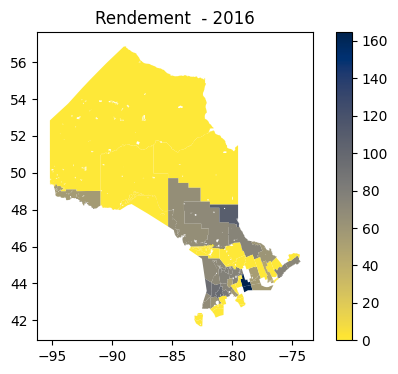

In [17]:
# comptez 30-40 secondes (ou plus)
def plot_map(df, year, var, figsize=(6, 4)):
    df.loc[df.Annee==year,:].plot(
        column=var,
        cmap='cividis_r',
        legend=True,
        figsize=figsize,
        missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",
        },
    )
    plt.title(F"{var.title()}  - {year}")
    plt.show()
    
plot_map(ontario_oats, 2016, 'Rendement')

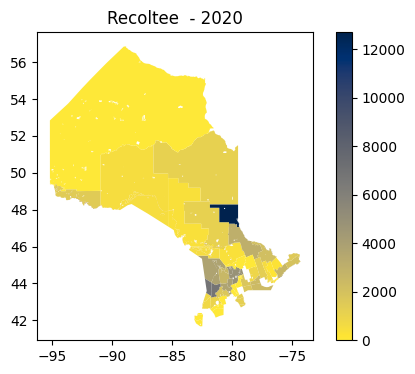

In [18]:
plot_map(ontario_oats, 2020, 'Recoltee')

En 2020, la plupart des acres récoltées se trouvaient au sud ouest.

### Étapes 2  -  Données de rendement + données géographiques + Données météo

In [19]:
ontario_oats.head()

,OGF_ID,SUBTYPE,STYPE_NUM,MUN_NAME,MUNID,MAH_CODE,EXTENT_T,ASSESS_C,NAME_PREF,NAME_SHORT,...,EFF_DATE,geometry,Region,Ensemencee,Recoltee,Rendement,Production_boisseaux,Production_tonnes,Onglet,Annee
0,67907495,Upper Tier Municipality,70,COUNTY OF NORTHUMBERLAND,14000,61074,Islands,1400,COUNTY OF,NORTHUMBERLAND,...,20220909103055,"MULTIPOLYGON (((-77.74251 43.97720, -77.74248 ...",Northumberland,394.917011,349.432698,61.443588,21.470399,0.436064,oats2022,2022
1,67907495,Upper Tier Municipality,70,COUNTY OF NORTHUMBERLAND,14000,61074,Islands,1400,COUNTY OF,NORTHUMBERLAND,...,20220909103055,"MULTIPOLYGON (((-77.74251 43.97720, -77.74248 ...",Northumberland,15.994022,10.774613,31.024343,0.334275,0.006789,oats2021,2021
2,67907495,Upper Tier Municipality,70,COUNTY OF NORTHUMBERLAND,14000,61074,Islands,1400,COUNTY OF,NORTHUMBERLAND,...,20220909103055,"MULTIPOLYGON (((-77.74251 43.97720, -77.74248 ...",Northumberland,3010.000000,2410.000000,24.543568,59.150000,0.912217,oats2020,2020
3,67907495,Upper Tier Municipality,70,COUNTY OF NORTHUMBERLAND,14000,61074,Islands,1400,COUNTY OF,NORTHUMBERLAND,...,20220909103055,"MULTIPOLYGON (((-77.74251 43.97720, -77.74248 ...",Northumberland,1640.000000,1410.000000,41.851032,59.009956,0.910058,oats2019,2019
4,67907495,Upper Tier Municipality,70,COUNTY OF NORTHUMBERLAND,14000,61074,Islands,1400,COUNTY OF,NORTHUMBERLAND,...,20220909103055,"MULTIPOLYGON (((-77.74251 43.97720, -77.74248 ...",Northumberland,1100.000000,860.000000,65.104651,55.990000,0.863484,oats2018,2018


In [20]:
# (comptez 20 secondes)
# Intégration des données de météo aux données de régions ontariennes
geometry = gpd.points_from_xy(weather.x, weather.y)
weather_gdf = gpd.GeoDataFrame(weather, geometry=geometry)
joined = gpd.sjoin(weather_gdf, ontario_oats, how="right", predicate="within")
joined = joined.loc[joined.STATION_NAME.notnull(),:]
joined.LOCAL_YEAR = joined.LOCAL_YEAR.astype(int)
my_data = joined.loc[joined.LOCAL_YEAR==joined.Annee, :]

/var/folders/jc/f6v43psn1vs2wsxdh3svtxfh0000gn/T/ipykernel_65898/2785669019.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  joined = gpd.sjoin(weather_gdf, ontario_oats, how="right", predicate="within")


In [21]:
my_data.head()

,index_left,Unnamed: 0,LOCAL_YEAR,STATION_NAME,x,y,LATITUDE,LONGITUDE,CLIMATE_IDENTIFIER,TOTAL_PRECIPITATION,...,EFF_DATE,geometry,Region,Ensemencee,Recoltee,Rendement,Production_boisseaux,Production_tonnes,Onglet,Annee
19,2163.0,3427.0,2022,STRATHROY-MULLIFARRY,-81.642802,42.980562,42.981,-81.643,6148122,746.6,...,20220909103101,"MULTIPOLYGON (((-81.43651 42.79026, -81.43651 ...",Middlesex,2226.739391,1878.250579,51.455739,96.646771,1.962896,oats2022,2022
20,2047.0,3263.0,2021,STRATHROY-MULLIFARRY,-81.642802,42.980562,42.981,-81.643,6148122,1028.4,...,20220909103101,"MULTIPOLYGON (((-81.43651 42.79026, -81.43651 ...",Middlesex,294.489662,153.313771,90.484517,13.872522,0.281751,oats2021,2021
21,1924.0,3095.0,2020,STRATHROY-MULLIFARRY,-81.642802,42.980562,42.981,-81.643,6148122,966.6,...,20220909103101,"MULTIPOLYGON (((-81.43651 42.79026, -81.43651 ...",Middlesex,1200.000000,1000.000000,64.700000,64.700000,0.997810,oats2020,2020
22,1815.0,2926.0,2019,STRATHROY-MULLIFARRY,-81.642802,42.980562,42.981,-81.643,6148122,1007.6,...,20220909103101,"MULTIPOLYGON (((-81.43651 42.79026, -81.43651 ...",Middlesex,500.000000,340.000000,52.053497,17.698189,0.272943,oats2019,2019
23,1711.0,2752.0,2018,STRATHROY-MULLIFARRY,-81.642802,42.980562,42.981,-81.643,6148122,1169.6,...,20220909103101,"MULTIPOLYGON (((-81.43651 42.79026, -81.43651 ...",Middlesex,1400.000000,700.000000,63.885714,44.720000,0.689676,oats2018,2018


In [22]:
my_data.head(2)

,index_left,Unnamed: 0,LOCAL_YEAR,STATION_NAME,x,y,LATITUDE,LONGITUDE,CLIMATE_IDENTIFIER,TOTAL_PRECIPITATION,...,EFF_DATE,geometry,Region,Ensemencee,Recoltee,Rendement,Production_boisseaux,Production_tonnes,Onglet,Annee
19,2163.0,3427.0,2022,STRATHROY-MULLIFARRY,-81.642802,42.980562,42.981,-81.643,6148122,746.6,...,20220909103101,"MULTIPOLYGON (((-81.43651 42.79026, -81.43651 ...",Middlesex,2226.739391,1878.250579,51.455739,96.646771,1.962896,oats2022,2022
20,2047.0,3263.0,2021,STRATHROY-MULLIFARRY,-81.642802,42.980562,42.981,-81.643,6148122,1028.4,...,20220909103101,"MULTIPOLYGON (((-81.43651 42.79026, -81.43651 ...",Middlesex,294.489662,153.313771,90.484517,13.872522,0.281751,oats2021,2021


In [23]:
def plot_map_improved(dat, year, var, with_labels=True, figsize=(10, 8)):
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.axis('off')
    ax.set_title('', fontdict={'fontsize': '5', 'fontweight' : '1'})
    color = 'Oranges'
    vmin = 0
    vmax = dat[var].max()*1.05

    mx = dat.loc[dat['LOCAL_YEAR']==year,:].drop_duplicates()
    mx.plot(var, cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(10,8),
          legend=True,
          legend_kwds={"label": f"{var} in {year}", "orientation": "horizontal"},
          missing_kwds={
        "color": "lightgrey",
        "edgecolor": "black",
        "hatch": "///",
        "label": "Missing values",
    },)
    if with_labels:
        tmp = mx.loc[:,['x', 'y', 'Region', 'STATION_NAME']].drop_duplicates()
        for idx, row in tmp.iterrows():
            #plt.annotate(text=F"{row['Region']}-{row['STATION_NAME']}", xy=(row['x'], row['y']),
            plt.annotate(text='x', xy=(row['x'], row['y']),
                    horizontalalignment='center', fontsize='small', color='black', wrap=True)
    plt.title(F'{year} - {var}')
    plt.show()

Plusieurs stations météorologiques font la collecte de données pour une même région géographique.
Elles sont parfois rapprochées et parfois plus éloignées.

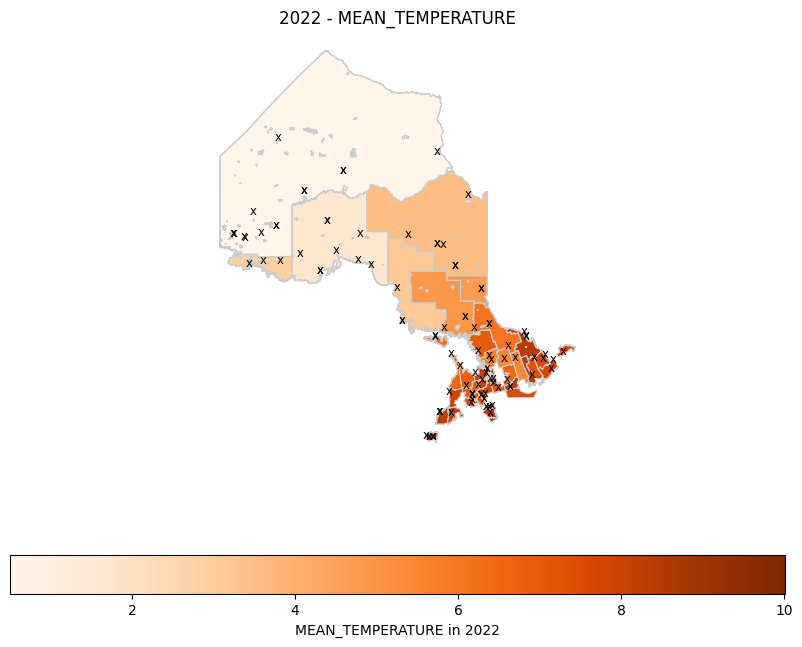

In [24]:
plot_map_improved(my_data, 2022, 'MEAN_TEMPERATURE', figsize=(10, 8))

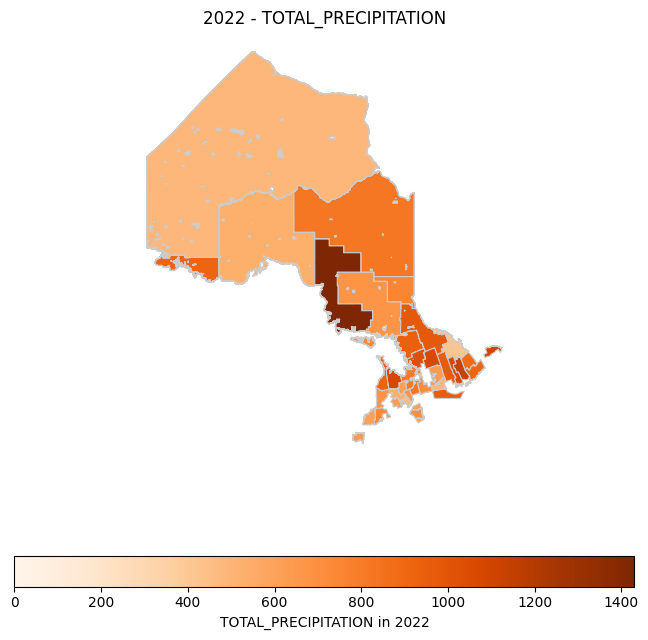

In [25]:
plot_map_improved(my_data, 2022, 'TOTAL_PRECIPITATION', with_labels=False, figsize=(8,8))

In [26]:
my_data.loc[my_data.TOTAL_PRECIPITATION==0,:]


,index_left,Unnamed: 0,LOCAL_YEAR,STATION_NAME,x,y,LATITUDE,LONGITUDE,CLIMATE_IDENTIFIER,TOTAL_PRECIPITATION,...,EFF_DATE,geometry,Region,Ensemencee,Recoltee,Rendement,Production_boisseaux,Production_tonnes,Onglet,Annee
245,2133.0,3388.0,2022,OAKVILLE TWN,-79.690000,43.512500,43.513,-79.690,6155750,0.0,...,20220909103056,"POLYGON ((-79.78375 43.56694, -79.78257 43.566...",Halton,37.426612,30.934565,26.034128,0.805354,0.016357,oats2022,2022
1716,129.0,194.0,2004,WAWA (AUT),-84.783333,47.966667,47.967,-84.783,6059408,0.0,...,20220909103119,"MULTIPOLYGON (((-84.87996 49.70919, -84.68708 ...",Algoma,1700.000000,1100.000000,64.197899,70.620000,1.089109,ots2004,2004


Certaines régions n'auraient reçu aucune précipitation en 2022 (valeur de 0). 
D'après vous, est-ce possible ?

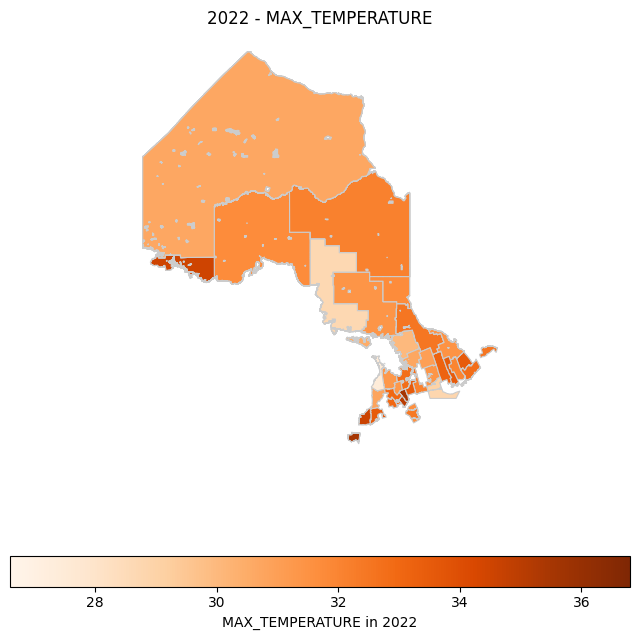

In [27]:
plot_map_improved(my_data, 2022, 'MAX_TEMPERATURE', with_labels=False, figsize=(8,8))

Certaines régions n'ont pas de données pour la température maximale enregistrée en 2015.

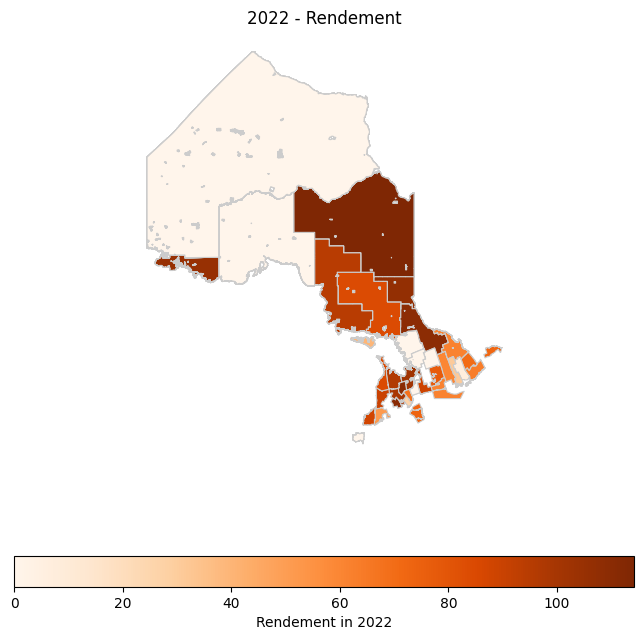

In [28]:
plot_map_improved(my_data, 2022, 'Rendement', with_labels=False, figsize=(8,8))

## Explorons un peu la matrice fusionnée 

Notre matrice de données contient maintenant les données de rendement et de météo.  Quelles informations pouvons-nous en tirer ?


Est-ce que nos données sont propres ou doivent-elles être nettoyées ?  Qu'en pensez-vous ?
<img style='float:right;'  src='https://drive.google.com/uc?export=view&id=1HMGzZe3dGBk9Zgpk0tKtbQarFu3WMrBK' width='100px'>  </a>

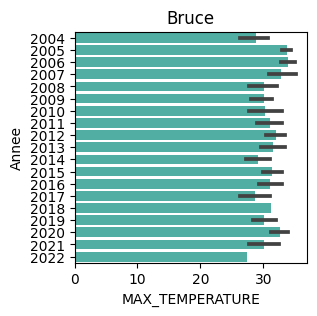

In [29]:
region = 'Bruce'
_ = plt.figure(figsize=(3,3))
mx = my_data.loc[my_data.Region==region,:]
sns.barplot(mx, x='MAX_TEMPERATURE', y='Annee', 
            orient='h', color=colors[0])
plt.title(region)
plt.show()

In [30]:
# Regardons les stations dont le nom contient 'BEATRICE' dans la région de Muskoka.  
# Les stations ne sont pas très éloignées. 
my_data.loc[my_data.STATION_NAME.str.contains("BEATRICE"), :].sort_values('LOCAL_YEAR').head(4)

,index_left,Unnamed: 0,LOCAL_YEAR,STATION_NAME,x,y,LATITUDE,LONGITUDE,CLIMATE_IDENTIFIER,TOTAL_PRECIPITATION,...,EFF_DATE,geometry,Region,Ensemencee,Recoltee,Rendement,Production_boisseaux,Production_tonnes,Onglet,Annee
1433,10.0,18.0,2004,BEATRICE 2,-79.400000,45.133333,45.133,-79.400,6110606,1077.4,...,20220909103057,"MULTIPOLYGON (((-78.91925 45.52441, -78.91159 ...",Muskoka,300.0,200.0,65.059396,13.01,0.200642,ots2004,2004
1431,239.0,437.0,2006,BEATRICE CLIMATE,-79.402778,45.140278,45.140,-79.403,6110607,1071.4,...,20220909103057,"MULTIPOLYGON (((-78.91925 45.52441, -78.91159 ...",Muskoka,229.0,200.0,47.000000,9.40,0.144968,oats2006,2006
1430,341.0,653.0,2007,BEATRICE CLIMATE,-79.402778,45.140278,45.140,-79.403,6110607,989.2,...,20220909103057,"MULTIPOLYGON (((-78.91925 45.52441, -78.91159 ...",Muskoka,100.0,100.0,43.000000,4.30,0.066315,oats2007,2007
1430,340.0,652.0,2007,BEATRICE 2,-79.400000,45.133333,45.133,-79.400,6110606,1075.8,...,20220909103057,"MULTIPOLYGON (((-78.91925 45.52441, -78.91159 ...",Muskoka,100.0,100.0,43.000000,4.30,0.066315,oats2007,2007


### Observations    
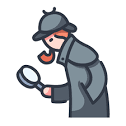


* Il y a plusieurs stations pour une même région

* Il y a plusieurs mesures par année par région, car il y a plusieurs stations météo par région



Nous ne voulons qu'une seule valeur par région pour les différentes caractéristiques météorologiques. 
Nous allons donc faire la moyenne des données des différentes stations pour une région donnée pour chaque année.

In [31]:
cols = ['LATITUDE', 'LONGITUDE','MEAN_TEMPERATURE', 'MIN_TEMPERATURE',
        'MAX_TEMPERATURE', 'TOTAL_PRECIPITATION', 'DAYS_WITH_VALID_PRECIP',
        'DAYS_WITH_PRECIP_GE_1MM', 'TOTAL_SNOWFALL', 'DAYS_WITH_VALID_SNOWFALL',
        'DAYS_WITH_VALID_SUNSHINE', 'Ensemencee','Recoltee', 'Rendement', 
        'Production_boisseaux', 'Production_tonnes','Annee']

t = pd.DataFrame()
for region in my_data.Region.unique():
    tmp = my_data.loc[my_data.Region==region,:]
    for year in tmp.LOCAL_YEAR.unique():
        tmp2 = tmp.loc[tmp.LOCAL_YEAR==year,:]
        tmp2 = tmp2.loc[:, cols]
        tmp2 = tmp2.mean(0)  # Nous faisons la moyenne pour chaque caractéristique
        tmp2['Region'] = region
        tmp2['Annee'] = year
        t = pd.concat([t, tmp2.T], axis=1)
t = t.T

In [32]:
tmp = t.copy()
tmp = tmp.drop_duplicates()
tmp.Annee = tmp.Annee.astype(int)
tmp.sort_values(['Rendement', 'Annee'], inplace=True)

Regardons les données aggrégées

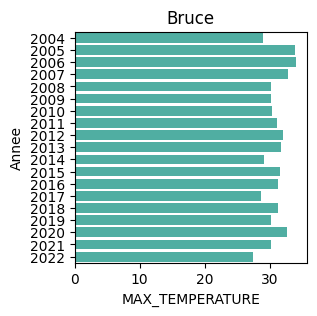

In [33]:
region = 'Bruce'
_ = plt.figure(figsize=(3,3))
sns.barplot(tmp.loc[tmp.Region==region,:],  x='MAX_TEMPERATURE', y='Annee', orient='h', color=colors[0])
plt.title(region)
plt.show()

La moyenne de température maximale pour les stations de la région de Bruce est légèrement moins élevée en 2022.  Est-ce que la collecte de données était complètes ?

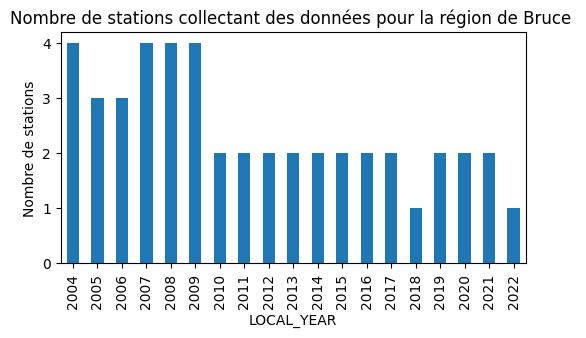

In [34]:
_ = plt.figure(figsize=(6,3))
mx.groupby('LOCAL_YEAR').count()['MAX_TEMPERATURE'].plot(kind='bar')
plt.title(F'Nombre de stations collectant des données pour la région de {region} ')
plt.ylabel('Nombre de stations')
plt.show()

Continuons l'exploration en générant des graphiques ciblés.  
Tous ne sont pas informatifs.  

Lesquels sont pertinents et véhiculent de l'information sur le jeu de données ?

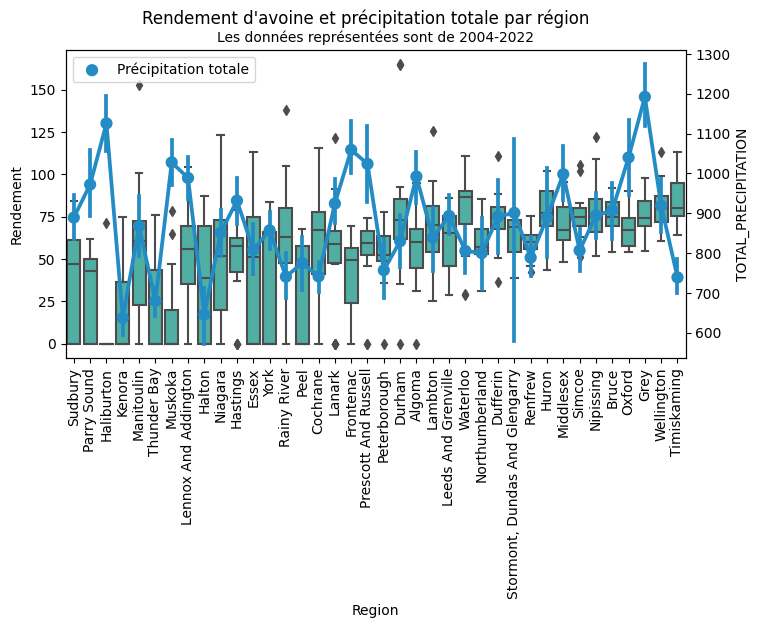

In [35]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(tmp, y='Rendement', x='Region', color=colors[0], ax=ax,)
plt.xticks(rotation=90)
ax2 = plt.twinx()
sns.pointplot(tmp,  y='TOTAL_PRECIPITATION', x='Region', color=colors[1], ax=ax2, label='Précipitation totale')
plt.xticks(rotation=90)
plt.suptitle("Rendement d'avoine et précipitation totale par région")
plt.title("Les données représentées sont de 2004-2022", fontsize=10)
plt.legend()
plt.show()

[]

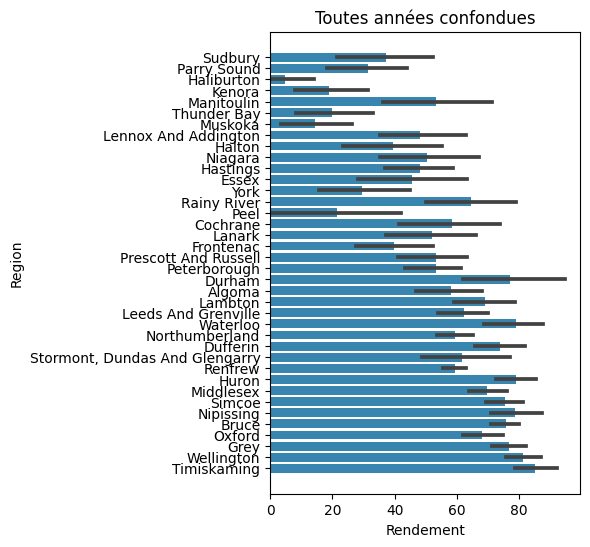

In [36]:
fig, ax = plt.subplots(figsize=(4,6))
sns.barplot(tmp,  x='Rendement', y='Region', orient='h', color=colors[1])#palette='Oranges')
plt.title('Toutes années confondues')
plt.plot()

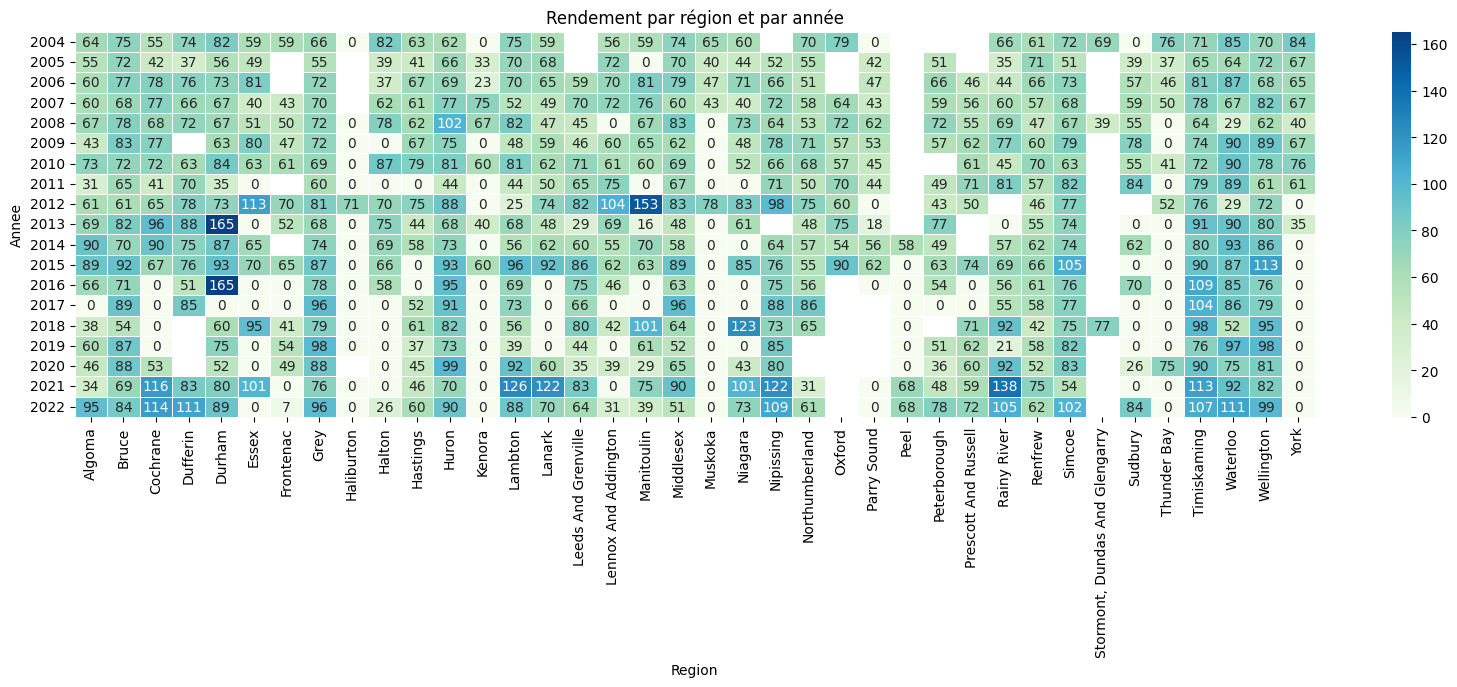

In [37]:
fig, ax = plt.subplots(figsize=(20,5))
mx = tmp.pivot(index="Annee", columns="Region", values="Rendement").astype('float')
sns.heatmap(mx, annot=True, ax=ax, fmt=".0f", cmap='GnBu', linewidths=.5)
plt.title('Rendement par région et par année')
plt.show()

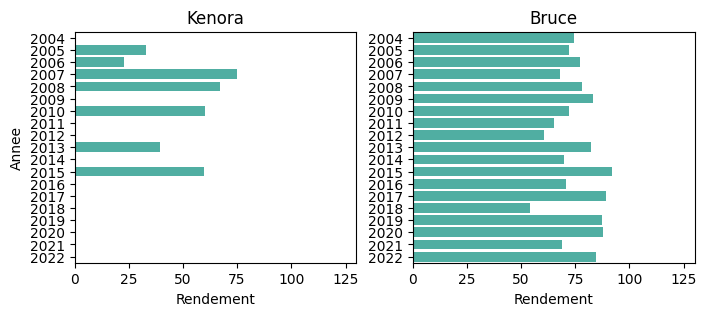

In [38]:
_= plt.figure(figsize=(8,3))
plt.subplot(121)
region = 'Kenora'
sns.barplot(tmp.loc[tmp.Region==region,:],  x='Rendement', y='Annee', orient='h', color=colors[0])
plt.title(region)
plt.xlim(0, 130)

plt.subplot(122)
region = 'Bruce'
sns.barplot(tmp.loc[tmp.Region==region,:],  x='Rendement', y='Annee', orient='h', color=colors[0])
plt.xlim(0, 130)
plt.ylabel('')
plt.title(region)
plt.show()

### Réflexions - Remises en question 

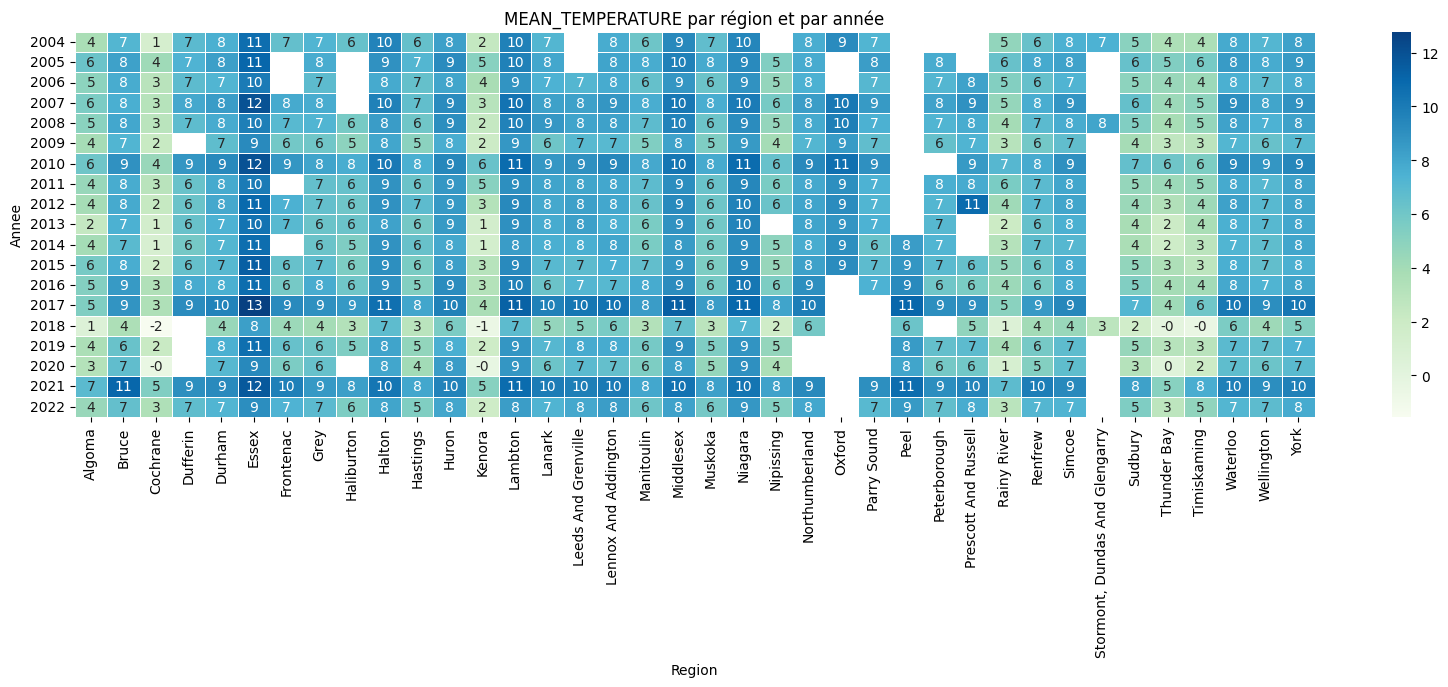

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
mx = tmp.pivot(index="Annee", columns="Region", values="MEAN_TEMPERATURE").astype('float')
sns.heatmap(mx, annot=True, ax=ax, fmt=".0f", cmap='GnBu', linewidths=.5)
plt.title('MEAN_TEMPERATURE par région et par année')
plt.show()

Ici la variable `MEAN_TEMPERATURE` n'est pas vraiment la valeur moyenne rencontrée durant l'année.

C'est plutôt la médiane des températures moyennes mensuelles que nous avions calculée plus tôt.  

Est-ce représentatif d'après vous ?  

Devrions-nous renommer la variable ou appliquer une autre transformation ?

In [40]:
tmp.to_csv('dataset_v1.csv')